## HW PANDAS: THE MAJORITY OF THIS NOTEBOOK IS A PANDAS LESSON. YOUR HW QUESTIONS MAY BE FOUND TOWARD THE END OF THE NB

So what exactly is pandas-- other than a cute bear endemic to China?

Pandas sits ontop of of an engine, a package called Numpy, which is an awesome, very fast package for analyzaing data. Panda takes all the power of NumPy, but it wraps it up in this user-friendly package. It gives us higher level tools that can do all of the things that we commonly do with data. A lot of the syntax for pandas was actually inspired by R.  R is a very data-oriented language. So the syntax really emphasizes functional programming. It leads to very clean, very explicit code that really makes clear all of the operations that we want to perform on data. Pandas has several core types that you need to become familiar with:

1. An Index
2. A Series
3. A Dataframe

First of all, there is an index.

An index is the way that we label the data. It's how we access different observations within our dataset.

Pandas has a series-- It represents a single column of data. It has an index, though.

And this could represent something like a variable-- maybe a list of measurements that we have. 

And then, finally, we have a data frame. A data frame is a combination of multiple series. It also has an index. And this is very much like a data table. This is the usual way in which we'll represent a data set that we're analyzing. So typically, every column in a data frame will represent a variable, and every roll will be an observation for our set of variables, or a unit of analysis. So the key to learning about pandas-- remember that it sits on top of NumPy, so it's very fast, it's very efficient. Now, as you're learning pandas, there's going to be some syntax and operations to get used to, so please be patient. But as you're asking questions, try to express your questions using the vocabulary of pandas so that you can get used to the pandas way of thinking about data.

### Pandas Series and Index

A pandas series is the way that we represent a single variable in pandas. So let's go ahead and start playing around with this.

I'll go ahead and run the imports and get an import NumPy; pandas, which we typically import as PD; and then to do a little bit of plotting at the end, I'm also going to import this plotting library which is matplotlib. And here is a little magic command that lets the plots that we create appear right here in the notebook. So we won't worry about that too much right at the moment because I really mainly want to focus on pandas.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

OK. Let's go ahead and start creating some series. So this is the type that we're going to be creating. And if I want to create one, there's a couple of ways to do it. One of the fastest is to just typecast a list. So maybe that's what I'll try doing right here. I'll feed in a list, in this case, representing grades. Let's see. Let's do five grades.


In [5]:
grades= pd.Series([83,72,72, 83, 92, 95, 95, 95])

In [6]:
#please run this:
grades

0    83
1    72
2    72
3    83
4    92
5    95
6    95
7    95
dtype: int64

And then one thing that I can do-- now this is totally optional, by the way-- but I can supply a name if I want to. So I can call this midterm. So this is midterm grades. 

In [8]:
grades= pd.Series([83,72,72, 83, 92, 95, 95, 95], name = 'midterm')


In [9]:
grades

0    83
1    72
2    72
3    83
4    92
5    95
6    95
7    95
Name: midterm, dtype: int64

And you can see here that the way the name is rendered is at the bottom of the series.

OK. So there's a couple of things to notice here. First of all, I guess-- well, the most important part is the set of numbers here on the right. And, of course, this is the data, the values that we're trying to store. So we could pull out that data. As I mentioned, under the hood is stored as a NumPy array. And we can confirm that by pulling it out individually using the values attribute.

In [12]:
grades.values

array([83, 72, 72, 83, 92, 95, 95, 95], dtype=int64)

And so this gives us a NumPy array, giving us just the data.

And because under the hood the values in a series are stored as a NumPy array, well, we can do a lot of operations on this. So, for example, I could use an expression like this to add a bonus point to every student.

In [15]:
grades + 1

0    84
1    73
2    73
3    84
4    93
5    96
6    96
7    96
Name: midterm, dtype: int64


And you can see every grade became incremented by 1. I could also do a Boolean operation. I could take a look and see, well, which grades are greater than or maybe greater than or equal to 90-- so greater than or equal to. So here you can see, we're checking to see which students actually got A's here.

In [17]:
grades >= 90

0    False
1    False
2    False
3    False
4     True
5     True
6     True
7     True
Name: midterm, dtype: bool

Let's take another look at the components of our series. So this set of numbers is the data values.nd you can see down here we have the name that we put in. And then over here on the left we have this other set of values. And this is actually a new type of object that we haven't seen before. This is something that we call an index. And I can access it using the index attribute of the series.

In [19]:
grades.index

RangeIndex(start=0, stop=8, step=1)

RangeIndex(start=0, stop=5, step=1)
And here if I do this, you can see it's telling me, well, I have a range index here. And I even know that it's starting at zero, stopping at five.

This isn't the only option that you have for your index. And, actually, a lot of the time you may find it helpful to use strings as your index labels. So I could go ahead and set this index to be something else if I wanted to. So I'll create a new index using pandas.index. And once again, I'm just going to be typecasting a list here.

So let's put in a couple of student names.

In [21]:
grades.index = pd.Index(['Ben', 'May', 'Sue', 'Beth', 'Richard', 'Ant', 'Austin', 'Dana'])

In [22]:
grades

Ben        83
May        72
Sue        72
Beth       83
Richard    92
Ant        95
Austin     95
Dana       95
Name: midterm, dtype: int64

And now if I take a look at grades again-- well, you can see what happened. We have the same data as before. But now, look over here. We have the name of a student that indexes each row of data. So this can be really helpful a lot of the time.

In [24]:
grades.index = pd.Index(['Ben', 'May', 'Sue', 'Beth', 'Richard', 'Ant', 'Austin', 'Dana'], name = 'Students')

In [25]:
grades

Students
Ben        83
May        72
Sue        72
Beth       83
Richard    92
Ant        95
Austin     95
Dana       95
Name: midterm, dtype: int64

And, by the way, you can see-- well, let me just mention the names that I've been giving here. Sometimes that's not important. But we'll see later on that if you do supply names that make sense, that can actually help you stay organized when you do more and more complicated operations. So even though it's not required, it can be helpful.

Now that we have this string index now, we can do things like access the values using the strings.


So, for example, I can put in Ben here to find out what Ben's grade is.

In [27]:
grades['Ben']

83

It tells me he got-- Ben got an 85. It can also put in a sequence. So, for example, let's put in a list that has both Ben and May.

In [29]:
grades[['Ben','May']]

Students
Ben    83
May    72
Name: midterm, dtype: int64

And you can see, you got both of their grades. You can see, actually, I get another series. This is a series that's shorter than the original series, but it has the same values that we had before.

We can also do Boolean selection. So let's say, before we took a look at which grades were A's, so just like that, I can put that back into the bracket, the bracket indexing, and just pull out a subseries that only contains those students that have A's. So that can be helpful a lot of the time.

In [31]:
grades[grades>=90]

Students
Richard    92
Ant        95
Austin     95
Dana       95
Name: midterm, dtype: int64

I want you to notice right now that really no matter how we manipulate this data, the idea here is that the index always corresponds to the values. So each of these index labels is always going to stick with the value that it's supposed to correspond to. So you can think of the indexes as really a way to keep track of what each value means, even as you're doing complicated operations that may rearrange your rows of data. Or maybe you extend the series or lose some data within the series. This is a way that you can make sure that you always know the meaning behind each of these values. So sometimes that can be useful. Other times you may not use the index very much at all. Sometimes when I code I don't really pay attention to the index. And it really depends on your coding style.

One last thing to notice is that pandas is closely integrated with the really important plotting library, matplotlib. And so a lot of easy plots can be pulled up very quickly from pandas objects. So, for example, I can use the histogram method, which is just hist, and call that on the series. And you can render it very quickly.

<Axes: >

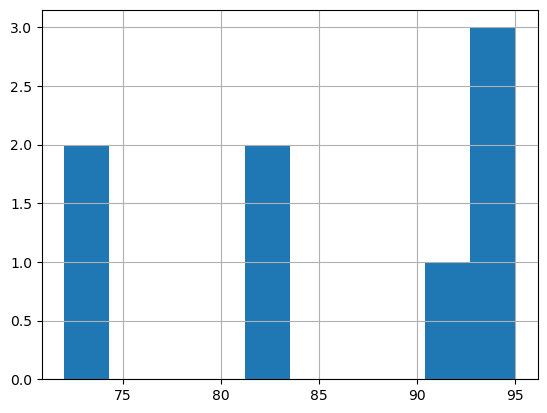

In [34]:
grades.hist()

Let's talk about the other major data type that we have in pandas, and that's the data frame. pandas.data. OK, so a data frame is basically just what you get if you take a couple of series, and you combine them together side by side. So it's a rectangular table that represents, well, you know, a table of data. And inside a data frame, every column that you have represents a variable, and that variable could have a different data type.



Take a quick look and see what I'm doing here, first to create a series of numbers that I'm going to call grades 1. And then I create another series of numbers that I call grades 2.

In [37]:
grades1 = pd.Series([99,98,100,56,95,92])
grades2 = pd.Series([97,99,95,84,96,78])


Next, here I construct an index, and you can see it has a couple of names in it. I also give the index this name is called student, and I set grades 1 dot index to be this new index.

In [39]:
grades1.index = pd.Index(["Jennifer", "Anoushka", "Lance", "Blake", "Aish", "Steve"], name = "student")

And by the way, here's a little trick, grades 2 dot index is actually set to the exact same index. So that's a little fun fact. Pandas indices are actually immutable objects, and so it's actually quite safe for more than one series to share the same index.

In [41]:
grades2.index = grades1.index

Let's go ahead and execute that, and let's just take a quick look to see what grades one looks like.

In [43]:

grades1

student
Jennifer     99
Anoushka     98
Lance       100
Blake        56
Aish         95
Steve        92
dtype: int64

I can see what grades 2 looks like. Same students, but different numbers. OK, so let's go ahead and create a data frame.

In [45]:
grades2

student
Jennifer    97
Anoushka    99
Lance       95
Blake       84
Aish        96
Steve       78
dtype: int64

So one way to create a data frame, let's call our data frame grade book.

So I could take the data from constructor, pandas.dataframe. And one thing I could do is I could just pass in a list of the series that I want. So in this case grade 1, grades 2. And I want to take a look at it. And there you have it. OK. Well, we have a data frame.

In [47]:
gradebook = pd.DataFrame([grades1, grades2])

In [48]:
gradebook

student,Jennifer,Anoushka,Lance,Blake,Aish,Steve
0,99,98,100,56,95,92
1,97,99,95,84,96,78


It probably isn't exactly what you were expecting, right? The students, we probably want the students to be along the rows, so one row per student, and one variable that represents the first grade and one variable that represents the second grade.

Well, it's actually pretty easy to fix this. I can take the transpose of a data frame.

In [51]:
gradebook = pd.DataFrame([grades1, grades2]).T

In [52]:
gradebook

,0,1
student,,
Jennifer,99,97
Anoushka,98,99
Lance,100,95
Blake,56,84
Aish,95,96
Steve,92,78


And so I can just add the transpose method right there, or I can just access with the t attribute. So here you can see we have exactly what we were hoping for. OK, so you can see the index here is now a student, so the entire data frame has an index. And it does have this nice name of student, but unfortunately, our variables don't have nice names. And there's a reason for that.

The reason is that back here when I constructed the series, the grades 1 and the grades 2 series. I didn't give them a name attribute. And if I had, if I had, you know, set the argument here, name equals, you know, midterm, and name equals final, then those names would have really nicely ended up here as the variable names. But because I didn't do that, maybe I need to manually set the names right now. So let's go ahead and do that. I can access those names using grade book dot columns. That's the attribute.

In [55]:
gradebook.columns

RangeIndex(start=0, stop=2, step=1)

You see, currently is just a range index. And I want to set that to something else.
And it's possible I could just supply a list, and it'll get converted into an index, so midterm and final.

In [57]:
gradebook.columns=['midterm', 'final']
gradebook

,midterm,final
student,,
Jennifer,99,97
Anoushka,98,99
Lance,100,95
Blake,56,84
Aish,95,96
Steve,92,78


OK, let's-- I'd like to mention one other way of creating a data frame.

This is one way to do it. And you can see it's really simple to explain, but actually, in practice, I don't use this method very much. A much more common strategy is to take a dictionary and pass it into the data frame constructor. So let me show you how I do that. I'll start from scratch. I'll say grade book, and you want to create new data frame. Now instead of passing in a list, I'll create a new dictionary.

And what goes into the dictionary is keys that become the variable name. So I want a variable name midterm, and I want the values to be grades 1, and then I want a variable name final. And I want the values to be grades 2.

In [59]:
gradebook = pd.DataFrame({'midterm': grades1, 'final':grades2})

And let's take a look at the grade. Get out of that. OK, so this is really convenient, right, because, well, for one thing, I don't have to take a transpose.

In [61]:
gradebook

,midterm,final
student,,
Jennifer,99,97
Anoushka,98,99
Lance,100,95
Blake,56,84
Aish,95,96
Steve,92,78


I get sort of these nice vertical variables, which is what we're hoping for, and I can also pass in the variable names that I want as I'm constructing the data frame. But let's say I wanted to change the order of these columns so that we had the finals column first, and then the midterm columns. wEll, there is a really easy way to order that.

In [63]:
gradebook = pd.DataFrame({'midterm': grades1, 'final':grades2}, columns = ['final', 'midterm'])
gradebook

,final,midterm
student,,
Jennifer,97,99
Anoushka,99,98
Lance,95,100
Blake,84,56
Aish,96,95
Steve,78,92


In this case, it's a pretty small data frame. This is what we have. And a lot of the time. Of course, your data frames will be a lot bigger than this, and if you just try to take a look at them the way that we're doing here, they'll fill up the screen, they'll become really unruly. It's hard to keep track of what you're doing.

And so a really common method that you have to use quite a bit is the head() Method. So you can take a look at this.

In [65]:
gradebook.head()

,final,midterm
student,,
Jennifer,97,99
Anoushka,99,98
Lance,95,100
Blake,84,56
Aish,96,95


And by default, what happens is the Head Method just pulls out a few of the rows for you to look at. In this case, I think we only had six rows to begin with, and we only lost one row. Looks like we only lost Steve, and we will use the head method.

I could override the default number of rows. I could say, well, I want the first three rows, and this lets me just take a peek at what's in the data frame/

In [67]:
gradebook.head(3)

,final,midterm
student,,
Jennifer,97,99
Anoushka,99,98
Lance,95,100


What if we wanted to just look at the final grades? We can use something called "attribute notation" to do that.

In [69]:
gradebook.final

student
Jennifer    97
Anoushka    99
Lance       95
Blake       84
Aish        96
Steve       78
Name: final, dtype: int64

What if you want to pull out a row from the data table? We'll have a lot more to say about this later on, but just really quickly, I want to point out that you can't just-- you might think that you could do something like dictionary notation, maybe. I want the grades that go with Aish. This doesn't work, unfortunately.

In [71]:
gradebook['Aish']

KeyError: 'Aish'

And the reason is that when you use this dictionary style notation, pandas thinks that you're looking for a column. Right, so it's going to take the string that you put in and try to match it against the columns, and of course, we get a key error when we want to do that. So this isn't the right style to use.

Probably the easiest way to pull out a row is to use what we call the loc indexer. A loc is an indexer that uses labels, and we'll have a lot more to say about that later on.But I just want to show you really quickly that if I use this type of indexing, I do in fact get a series with just Ben.

In [90]:
gradebook.loc['Aish']

final      96
midterm    95
Name: Aish, dtype: int64

Now, let's actually manipulate some of these variables a little. I can change the values in a variable with regular old assignment.v So for example, I can take gradebook dot final, and set it to something new. Maybe what I want to do is just give everybody a bonus point.

In [93]:
gradebook.final= gradebook.final + 1
gradebook

,final,midterm
student,,
Jennifer,98,99
Anoushka,100,98
Lance,96,100
Blake,85,56
Aish,97,95
Steve,79,92


And let's take a look at the grade book again. And you can see, for example, Ben had an 84 on the final, and now we've altered the final variable, so Blake has an 85.

We can also create new columns. So let's say that we want to add a column for homework, and the way that we would do that is also with a dictionary style assignment. So let's take a grade book and in parentheses, I'm going to create a new variable name. We'll call that homework, and I can set this to a new list, or a new series.

I'm going to be lazy here. I'm just going to pass in a list of six 90's, so everybody gets the same homework grade. I can take another look. You can see we've added a new variable. OK.

In [95]:
gradebook['homework']=[90] * 6
gradebook

,final,midterm,homework
student,,,
Jennifer,98,99,90
Anoushka,100,98,90
Lance,96,100,90
Blake,85,56,90
Aish,97,95,90
Steve,79,92,90


Let's say that we decided that was a mistake, and we don't actually want that variable. You might wonder, well, how can we delete that variable? Well, there's a couple of ideas. One is to use the del basic Python operator. So I could just say del a gradebook of homework, for example.

In [97]:
del gradebook['homework']
gradebook

,final,midterm
student,,
Jennifer,98,99
Anoushka,100,98
Lance,96,100
Blake,85,56
Aish,97,95
Steve,79,92


And then when I take another look at a grade book, you can see the homework is gone. That's one way to do it, but I actually don't like using the del operator very much. The way that I would prefer to actually drop things out of a data frame is with the drop method.

It's worth taking a look at the documentation for the drop method. You can see the first thing that you do is you pass in a label of the things that you want to drop, and then the second argument is really important. That's the axis. Right, so the reason for that is that drop actually works on either rows or columns.

So in this case, let's say you want to drop, for example, the final. We have to tell Python whether we want to drop final from the rows, from the columns, and we're going to use the axis argument to do that. So this is a little bit confusing at first. Actually, axis is really common in a lot of Python methods, in a lot of pandas methods. You're going to have to set the axis argument.

In [99]:
gradebook.drop('final', axis = 1)
# axis 0 >>rows
# axis 1 >> columns


,midterm
student,
Jennifer,99
Anoushka,98
Lance,100
Blake,56
Aish,95
Steve,92


I have to actually manually override this, if I want to remember this grade book without the final. And just for fun, let me show you what it would look like to drop a row. So in this case, let's try to drop the row for Blake. And I'm going to see-- I'm going to set access to 0 here, because now I'm dropping a row, which means that the number of rows is changing, not the number of columns. So that's an indication that I really want to set axis equals 0, and if you scan through this list, you can confirm that there's no Blake in the

In [105]:
gradebook.drop('Blake', axis = 0)

,final,midterm
student,,
Jennifer,98,99
Anoushka,100,98
Lance,96,100
Aish,97,95
Steve,79,92


OK. One last point that I want to make about data frames is that data frames are also very nicely integrated with the plotting library, matplotlib. And so a lot of times as you're exploring or wrangling your data, you're going to want to pull up some diagnostic plots quickly in order to see what features you have. So that's really easy and in pandas.

I'm going to type grade book dot plot, which gives me access to a several plotting methods. And in this case, I want a scatterplot. So in order to have a scatterplot, I have to tell PANDAS what variable I want on the x-axis. So maybe I want the midterm on the x, and I have to tell it what I want on the y-axis, and maybe the final on the y-axis, and you can see that was really nice and easy. I have this great scatterplot just for, you know-- because it's such an important practice, I'm going to go ahead and give it title.

And there you can see our nice scatterplot, and actually the names of the variables are automatically placed along on the axes, so you have a good idea of what you're doing. You have to do a lot more work if you want to make this maybe a publication quality plot, but as long as what you're doing is just exploring and trying to understand your data, this is a really nice and easy fast way to pull up some graphics. That's very important.

<Axes: title={'center': 'Midterm and Final Grades'}, xlabel='midterm', ylabel='final'>

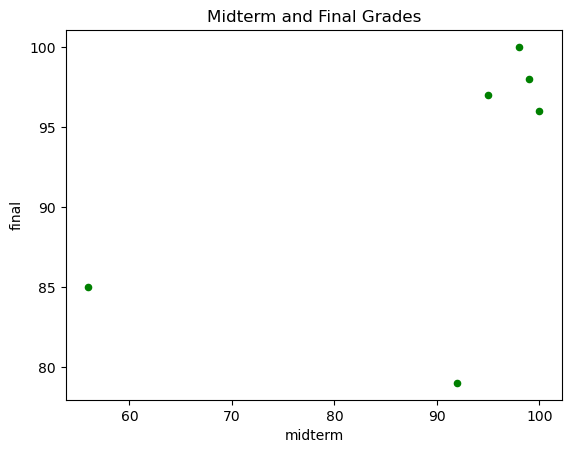

In [108]:
gradebook.plot.scatter(x = 'midterm', y= 'final', title = 'Midterm and Final Grades', color = 'green')


And finally, one thing that we might want to do is just save our progress, and maybe we want to save to a CSV file, so we can take grade book, and there's this really handy two CSV method. And all you have to do is type in the file name that you want, and when I execute this, I'm going to save it to the CSV, and that means we can come back later on and continue playing with this data.

### Dataframes with built in Seaborn Data
The seaborn viz package has some datasets that come with the package. One of the is car crashes. Let's look at that dataset, build a datframe and practice querying. 


In [111]:
!pip install seaborn
import pandas as pd
import seaborn as sns

In [112]:
#Load the car frashes dataset
df = sns.load_dataset('car_crashes')

In [113]:

# If you want to save the dataset to a CSV file to play with later
df.to_csv('car_crashes.csv', index=False)
#This saves df as a file named car_crashes.csv in your current directory. 
#Setting index=False omits the row indices from the saved file, making it cleaner for external use.


Let's say I'm only interested in cases where speeding is greater than 7. What does that mean? It is the percentage of crashes involving speeding.


In [115]:
df.query('speeding > 7')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
38,18.2,9.100,5.642,17.472,16.016,905.99,153.86,PA
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


In [116]:
#How about cases where speeding is greater than 7 AND alcohol is greater than 9?

df.query('speeding > 7 and alcohol >9')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC


In [117]:
#How about cases where speeding is greater than 7 OR alcohol is greater than 9?
df.query('speeding > 7 or alcohol >9')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
38,18.2,9.100,5.642,17.472,16.016,905.99,153.86,PA
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV


What about filtering by abbreviation? Sure you can.

In [119]:
pa_df = df.query('abbrev == "PA"')
pa_df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
38,18.2,9.1,5.642,17.472,16.016,905.99,153.86,PA


In [120]:
## What if I wanted to create a new column for insurance premium plus insurance losses?
df['total_cost'] = df['ins_premium'] + df['ins_losses']
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,total_cost
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,929.63
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,1187.41
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,1009.82
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,969.73
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,1044.04


### Loc and iloc methods
The query method helps us select certain columns. Both loc and iloc are powerful methods for selecting rows and columns in a pandas dataframe.


#### Loc Method
The loc method in pandas is used for label-based indexing. It allows you to select rows and columns by their labels The syntax is df.loc[row,column]
### Iloc Method
The syntax for the iloc method in Pandas is straightforward and allows selection by row and column positions. The syntax is df.iloc[row_selection, column_selection]


Here are some examples using the loc method to access specific rows and then extract particular columns within those rows in the car_crashes dataset:

1. Accessing a Particular Row, then a Single Column
Let's start by selecting a specific row and then retrieving only one column from that row.

In [123]:
# Select row for the state with index 2 and get the 'alcohol' column
alcohol_value = df.loc[2, 'alcohol']
alcohol_value
#This will return the alcohol value for the state at index 2.

5.208000000000001


2. Accessing a Row by Condition, then a Particular Column
You can also filter a row based on a condition and then retrieve a specific column.




In [125]:
# Find the row where the state abbreviation is 'CA' and get the 'ins_premium' column
ins_premium_ca = df.loc[df['abbrev'] == 'CA', 'ins_premium'].values[0]
ins_premium_ca
#This will return the ins_premium for the state of California (abbrev = 'CA').


878.41

3. Accessing a Row Range, then a Single Column
You can select a range of rows and retrieve a particular column for those rows.



In [127]:
# Select rows from index 0 to 4 and get the 'speeding' column
speeding_values = df.loc[0:4, 'speeding']
speeding_values
#This returns the speeding column values for the first five rows, which represent car crash statistics for those entries.



0    7.332
1    7.421
2    6.510
3    4.032
4    4.200
Name: speeding, dtype: float64

4. Accessing a Row Based on Condition, then Multiple Columns
With loc, you can also specify multiple columns after filtering a row by condition.



In [129]:
# Select the row where 'total' is greater than 20 and get the 'abbrev' and 'ins_losses' columns
high_total_losses = df.loc[df['total'] > 20, ['abbrev', 'ins_losses']]
high_total_losses
#This returns the abbrev (state abbreviation) and ins_losses for all rows where the total crash rate is above 20.


,abbrev,ins_losses
3,AR,142.39
17,KY,137.13
18,LA,194.78
26,MT,85.15
34,ND,109.72
40,SC,116.29
48,WV,152.56


In [130]:
# Select all columns for the row with index 3
row_3 = df.loc[3, :]
row_3
#This returns all the columns for the row at index 3. The : symbol selects all columns, which is useful for getting complete details of a specific row

total               22.4
speeding           4.032
alcohol            5.824
not_distracted    21.056
no_previous        21.28
ins_premium       827.34
ins_losses        142.39
abbrev                AR
total_cost        969.73
Name: 3, dtype: object

### iloc method: In general, I do not use indexing by position as much. But I thought I'd show it to you.
1. Selecting a Single Row by Index Position
With iloc, you can select a row using its position, which starts from 0 for the first row.


In [132]:
# Select the first row (position 0)
row_0 = df.iloc[0]
row_0
#This will return the entire first row of data as a Series, giving us all columns for the row at position 0.

total               18.8
speeding           7.332
alcohol             5.64
not_distracted    18.048
no_previous        15.04
ins_premium       784.55
ins_losses        145.08
abbrev                AL
total_cost        929.63
Name: 0, dtype: object

2. Selecting Specific Rows and Columns by Position
With iloc, you can select specific rows and columns based on their position in the dataset. Here, we'll get the first three rows and the first two columns.



In [134]:
# Select the first three rows and first two columns
subset = df.iloc[0:3, 0:2]
subset
#This gives us a smaller DataFrame containing only the first two columns (total and speeding) for the first three rows.

,total,speeding
0,18.8,7.332
1,18.1,7.421
2,18.6,6.510


### Pandas Groupby Method
The groupby method in Pandas is powerful for grouping data by one or more columns and then applying various functions to summarize or transform the grouped data. Here are some examples using the car_crashes dataset.

Let's say you want to group by the abbrev column (state abbreviation) and calculate the mean of all other numerical columns.

In [138]:
# Group by 'abbrev' and calculate the mean for each group
mean_by_state = df.groupby('abbrev').mean()
mean_by_state


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,total_cost
abbrev,,,,,,,,
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,1187.41
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08,929.63
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39,969.73
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35,1009.82
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63,1044.04
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91,975.41
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,1235.75
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,1409.94
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,1289.35


2. Grouping by a Column and Applying Multiple Aggregation Functions
You can use multiple functions, like mean and sum, for each column in the group.


In [140]:
aggregated_by_state = df.groupby('abbrev').agg(['mean', 'sum'])
aggregated_by_state

#This will return a DataFrame where each column contains both the mean and sum for each group, providing a broader summary.

total       speeding        alcohol         not_distracted          \
        mean   sum     mean    sum    mean     sum           mean     sum   
abbrev                                                                      
AK      18.1  18.1    7.421  7.421   4.525   4.525         16.290  16.290   
AL      18.8  18.8    7.332  7.332   5.640   5.640         18.048  18.048   
AR      22.4  22.4    4.032  4.032   5.824   5.824         21.056  21.056   
AZ      18.6  18.6    6.510  6.510   5.208   5.208         15.624  15.624   
CA      12.0  12.0    4.200  4.200   3.360   3.360         10.920  10.920   
CO      13.6  13.6    5.032  5.032   3.808   3.808         10.744  10.744   
CT      10.8  10.8    4.968  4.968   3.888   3.888          9.396   9.396   
DC       5.9   5.9    2.006  2.006   1.593   1.593          5.900   5.900   
DE      16.2  16.2    6.156  6.156   4.860   4.860         14.094  14.094   
FL      17.9  17.9    3.759  3.759   5.191   5.191         16.468  16.468   
GA      15.6  15.6    2.964  2.964   3.900   3.900         14.820  14.820   
HI      17.5  17.5    9.450  9.450   7.175   7.175         14.350  14.350   
IA      15.7  15.7    2.669  2.669   3.925   3.925         15.229  15.229   
ID      15.3  15.3    5.508  5.508   4.437   4.437         13.005  13.005   
IL      12.8  12.8    4.608  4.608   4.352   4.352         12.032  12.032   
IN      14.5  14.5    3.625  3.625   4.205   4.205         13.775  13.775   
KS      17.8  17.8    4.806  4.806   4.272   4.272         13.706  13.706   
KY      21.4  21.4    4.066  4.066   4.922   4.922         16.692  16.692   
LA      20.5  20.5    7.175  7.175   6.765   6.765         14.965  14.965   
MA       8.2   8.2    1.886  1.886   2.870   2.870          7.134   7.134   
MD      12.5  12.5    4.250  4.250   4.000   4.000          8.875   8.875   
ME      15.1  15.1    5.738  5.738   4.530   4.530         13.137  13.137   
MI      14.1  14.1    3.384  3.384   3.948   3.948         13.395  13.395   
MN       9.6   9.6    2.208  2.208   2.784   2.784          8.448   8.448   
MO      16.1  16.1    6.923  6.923   5.474   5.474         14.812  14.812   
MS      17.6  17.6    2.640  2.640   5.456   5.456          1.760   1.760   
MT      21.4  21.4    8.346  8.346   9.416   9.416         17.976  17.976   
NC      16.8  16.8    6.552  6.552   5.208   5.208         15.792  15.792   
ND      23.9  23.9    5.497  5.497  10.038  10.038         23.661  23.661   
NE      14.9  14.9    1.937  1.937   5.215   5.215         13.857  13.857   
NH      11.6  11.6    4.060  4.060   3.480   3.480         10.092  10.092   
NJ      11.2  11.2    1.792  1.792   3.136   3.136          9.632   9.632   
NM      18.4  18.4    3.496  3.496   4.968   4.968         12.328  12.328   
NV      14.7  14.7    5.439  5.439   4.704   4.704         13.965  13.965   
NY      12.3  12.3    3.936  3.936   3.567   3.567         10.824  10.824   
OH      14.1  14.1    3.948  3.948   4.794   4.794         13.959  13.959   
OK      19.9  19.9    6.368  6.368   5.771   5.771         18.308  18.308   
OR      12.8  12.8    4.224  4.224   3.328   3.328          8.576   8.576   
PA      18.2  18.2    9.100  9.100   5.642   5.642         17.472  17.472   
RI      11.1  11.1    3.774  3.774   4.218   4.218         10.212  10.212   
SC      23.9  23.9    9.082  9.082   9.799   9.799         22.944  22.944   
SD      19.4  19.4    6.014  6.014   6.402   6.402         19.012  19.012   
TN      19.5  19.5    4.095  4.095   5.655   5.655         15.990  15.990   
TX      19.4  19.4    7.760  7.760   7.372   7.372         17.654  17.654   
UT      11.3  11.3    4.859  4.859   1.808   1.808          9.944   9.944   
VA      12.7  12.7    2.413  2.413   3.429   3.429         11.049  11.049   
VT      13.6  13.6    4.080  4.080   4.080   4.080         13.056  13.056   
WA      10.6  10.6    4.452  4.452   3.498   3.498          8.692   8.692   
WI      13.8  13.8    4.968  4.968   4.554   4.554          5.382   5.382   
WV 

3.Grouping by Multiple Columns
You can group by more than one column by passing a list of column names. For example, if we grouped by abbrev and total crash rates:


In [142]:
# Group by 'abbrev' and 'total' and calculate the mean
grouped_by_multiple = df.groupby(['abbrev', 'total']).mean()
grouped_by_multiple
#This creates a multi-level index where each state and total crash rate pair is treated as a unique group.

,,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,total_cost
abbrev,total,,,,,,,
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,1187.41
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08,929.63
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39,969.73
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35,1009.82
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63,1044.04
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91,975.41
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,1235.75
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,1409.94
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,1289.35


# ASSIGNMENT QUESTIONS

## RAND Database of Worldwide Terrorism Incidents
The RAND Database of Worldwide Terrorism Incidents (RDWTI) is a compilation of data from 1968 through 2009.

This legacy RAND project developed and maintained a database of terrorism incidents stretching back to 1968, which provides comprehensive information on international and domestic terrorism. Over the years, many public and private sponsors have contributed to the maintenance of the RDWTI and its predecessors, the RAND Terrorism Chronology and the RAND-MIPT Terrorism Incident Database.

The data can be found here: https://www.rand.org/nsrd/projects/terrorism-incidents.html

With over 40,000 incidents of terrorism coded and detailed, the quality and completeness of the RDWTI was remarkable for its time. RAND staff conducted extensive research on candidate terrorist attacks, drawing on staff with regional expertise, relevant language skills, and in-country field work experience.

Please navigate to this website and download the data
Save the data as a csv file
Read the csv file into a pandas dataframe.

1.  Please navigate to this website and download the data
Save the data as a csv file
Read the csv file into a pandas dataframe.

In [160]:
#Your code here

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/jaa262/Desktop/RAND_Database_of_Worldwide_Terrorism_Incidents.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1") #this ISO encoding helped to prevent some errors when reading in the dataset

In [164]:
df.to_csv('RAND_Database_of_Worldwide_Terrorism_Incidents', index=False)

#This saves df as a file named "Rand_Database...", in my current directory. 
#Setting index=False omits the row indices from the saved file, making it cleaner for external use.

2. Show me the .head() of the df

In [166]:
#your code here:
df.head()

,Date,City,Country,Perpetrator,Weapon,Injuries,Fatalities,Description
0,9-Feb-68,Buenos Aires,Argentina,Unknown,Firearms,0,0,ARGENTINA. The second floor of the U.S. embas...
1,12-Feb-68,Santo Domingo,Dominican Republic,Unknown,Explosives,0,0,DOMINICAN REPUBLIC. A homemade bomb was found...
2,13-Feb-68,Montevideo,Uruguay,Unknown,Fire or Firebomb,0,0,URUGUAY. A Molotov cocktail was thrown outsid...
3,20-Feb-68,Santiago,Chile,Unknown,Explosives,0,0,CHILE. An explosion from a single stick of dy...
4,21-Feb-68,"Washington, D.C.",United States,Unknown,Explosives,0,0,UNITED STATES. The Soviet embassy was bombed ...


Part 1: Please use the data, and provide evidence to answer the questions below. Please use visualizations/plots where appropriate to tell convey your evidence more completely.

3.What are the top 5 countries where terrorism incidents occured?

Top 5 countries with the most terrorism incidents:

          Country  Incident_Count
0            Iraq           10763
1  West Bank/Gaza            2038
2     Afghanistan            2025
3        Thailand            2009
4        Colombia            1913




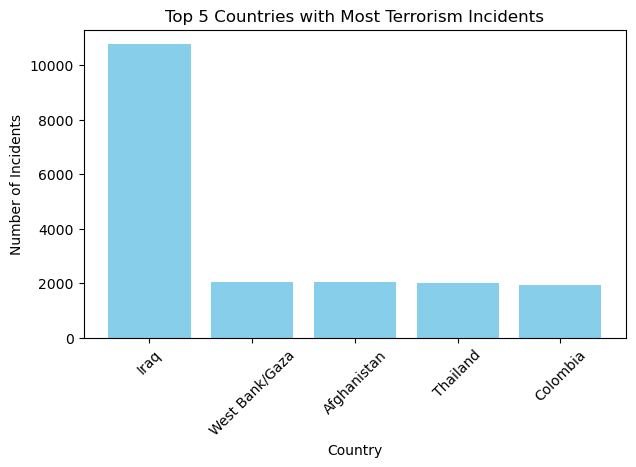



Iraq is the country that is had the highest terrism incidents follow by West Bank/Gaza, Afghanistan, Thailand and Colombia 



In [172]:
#Your code here:

# This code identifies the top 5 countries with the highest number of terrorism incidents.
# It counts incidents per country, extracts the top 5, and organizes the results in a DataFrame for easy readability.
# A bar chart visualizes these countries and their incident counts, providing a quick comparison of the most affected regions.

# Count the number of incidents per country and convert to a DataFrame
top_countries = df['Country'].value_counts().head(5).reset_index()
top_countries.columns = ['Country', 'Incident_Count']  # Rename columns

# Display the top 5 countries with the incident count
print("Top 5 countries with the most terrorism incidents:\n")
print(top_countries)

print("\n========================================================================================================================\n")

# Visualization
plt.figure(figsize=(7, 4))
plt.bar(top_countries['Country'], top_countries['Incident_Count'], color='skyblue')
plt.title("Top 5 Countries with Most Terrorism Incidents")
plt.xlabel("Country")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()

print("\n========================================================================================================================\n")

print(f"Iraq is the country that is had the highest terrism incidents follow by West Bank/Gaza, Afghanistan, Thailand and Colombia \n")

4.What were the top 10 most deadly attacks?

Top 10 most deadly attacks:
              Country  Fatalities
12718   United States        2749
35403            Iraq         500
8062          Algeria         400
19357          Russia         331
4060           Canada         329
6796            India         317
5393   United Kingdom         270
12535          Angola         252
3466          Lebanon         241
18121          Uganda         239




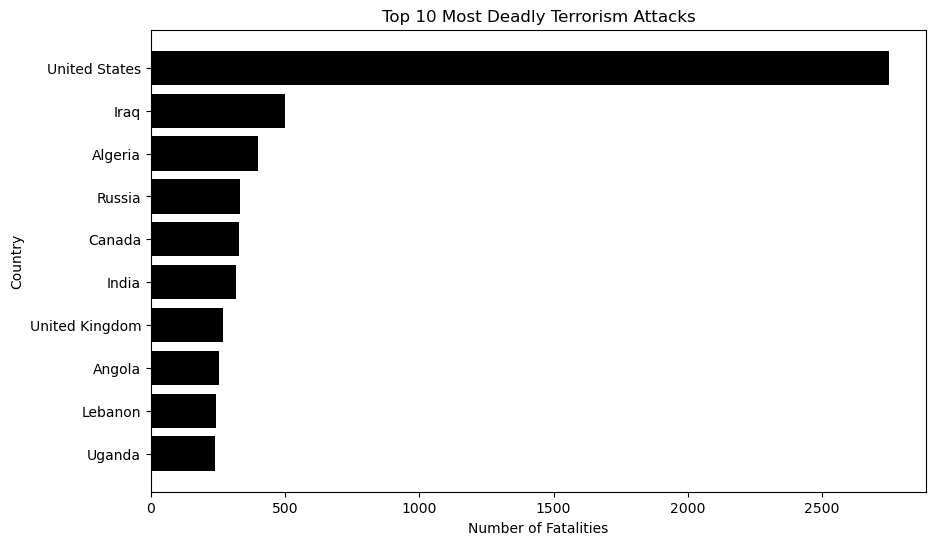

In [185]:
#Your code here:

# This code identifies the top 10 most deadly attacks based on the number of fatalities.
# It sorts incidents by the 'Fatalities' column in descending order, assuming that a higher fatality count 
# indicates deadlier attacks. The top 10 results are displayed, including the country, fatality count, 
# and a brief description of each incident for context.

top_deadly_attacks = df.sort_values(by='Fatalities', ascending=False).head(10)

# Display the top 10 most deadly attacks
print("Top 10 most deadly attacks:")
print(top_deadly_attacks[['Country', 'Fatalities']])  # Adjust columns as needed

print("\n=============================================================================================\n")

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(top_deadly_attacks['Country'], top_deadly_attacks['Fatalities'], color='black')
plt.xlabel("Number of Fatalities")
plt.ylabel("Country")
plt.title("Top 10 Most Deadly Terrorism Attacks")
plt.gca().invert_yaxis()  # Highest fatalities at the top
plt.show()

5. How often was "kidnapping" or some derviation of the word mentioned in all of the incident reports?

In [215]:
# This code counts incidents related to kidnapping by filtering descriptions for a list of keywords, including variations like "abduction" and "hostage."
# It builds a regular expression pattern from the keywords, applies it to the dataset, and then displays the total number of relevant incidents.


# Define expanded list of kidnapping-related keywords
kidnap_keywords = [
    "kidnap", "kidnapped", "kidnapping", "abduct", "abducted", "abduction",
    "hostage", "hostages", "held", "holding", "captured", "capture", "taken",
    "seized", "seize", "detained", "detention", "captive", "captivity", "prisoner",
    "snatch", "snatched", "imprisoned", "confined", "held against will"
]

# Create a regular expression pattern from the keywords list
kidnap_pattern = '|'.join(kidnap_keywords)
#print(kidnap_pattern)

# Filter for incidents mentioning any variation of "kidnap" or related terms
kidnap_mentions = df[df['Description'].str.contains(kidnap_pattern, case=False, na=False)]

# Count occurrences
num_kidnap_mentions = kidnap_mentions.shape[0]

# Display the count
print(f"'Kidnapping' or a related term was mentioned in {num_kidnap_mentions} incidents.")

'Kidnapping' or a related term was mentioned in 4291 incidents.


In [213]:
#By looking into other columns and not just the description

# Define expanded list of kidnapping-related keywords
kidnap_keywords = [
    "kidnap", "kidnapped", "kidnapping", "abduct", "abducted", "abduction",
    "hostage", "hostages", "held", "holding", "captured", "capture", "taken",
    "seized", "seize", "detained", "detention", "captive", "captivity", "prisoner",
    "snatch", "snatched", "imprisoned", "confined", "held against will"
]

# Create a regular expression pattern from the keywords list
kidnap_pattern = '|'.join(kidnap_keywords)

# Filter for incidents mentioning any variation of "kidnap" or related terms in any column
kidnap_mentions = df[df.apply(lambda row: row.astype(str).str.contains(kidnap_pattern, case=False, na=False).any(), axis=1)]

# Count occurrences
num_kidnap_mentions = kidnap_mentions.shape[0]

# Display the count
print(f"'Kidnapping' or a related term was mentioned in {num_kidnap_mentions} incidents across all columns.")

'Kidnapping' or a related term was mentioned in 4291 incidents across all columns.


In [227]:
#By using Word2Vec

# This code identifies incidents related to kidnapping by combining manually defined terms with related terms suggested by a Word2Vec model.
# It trains Word2Vec on incident descriptions, finds terms similar to "kidnap," and then filters the dataset using this expanded list of keywords.
# The result is a count of incidents where kidnapping or related terms are mentioned.

from gensim.models import Word2Vec
import re

# Load the dataset
file_path = "C:/Users/jaa262/Desktop/RAND_Database_of_Worldwide_Terrorism_Incidents.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Preprocess text: tokenize descriptions into sentences of words
sentences = df['Description'].dropna().apply(lambda x: re.findall(r'\b\w+\b', x.lower())).tolist()

# Train Word2Vec model on tokenized sentences
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get the top 10 words most similar to "kidnap" according to the Word2Vec model
similar_words = [word for word, score in model.wv.most_similar("kidnap", topn=10)]

#print(f"Similar words to Kidnap generated by Word2Vec are:", similar_words)

# Define initial list of kidnapping-related keywords
manual_kidnap_keywords = [
    "kidnap", "kidnapped", "kidnapping", "abduct", "abducted", "abduction",
    "hostage", "hostages", "held", "holding", "captured", "capture", "taken",
    "seized", "seize", "detained", "detention", "captive", "captivity", "prisoner",
    "snatch", "snatched", "imprisoned", "confined", "held against will"
]

# Combine the manually defined keywords with the words found by Word2Vec
expanded_kidnap_keywords = list(set(manual_kidnap_keywords + similar_words))

# Create a regular expression pattern from the expanded keywords list
kidnap_pattern = '|'.join(expanded_kidnap_keywords)

# Filter for incidents mentioning any expanded kidnapping-related term
kidnap_mentions = df[df['Description'].str.contains(kidnap_pattern, case=False, na=False)]

# Count occurrences
num_kidnap_mentions = kidnap_mentions.shape[0]

# Display the count
print(f"Using Word2Vec, 'Kidnapping' or a related term was mentioned in {num_kidnap_mentions} incidents.")

#I noticed that every time I run this code, I get a different answer

Using Word2Vec, 'Kidnapping' or a related term was mentioned in 5352 incidents.


Number of times each kidnapping-related term was mentioned:
Kidnap: 3398.0
Kidnapped: 2425.0
Kidnapping: 552.0
Abduct: 778.0
Abducted: 570.0
Abduction: 134.0
Hostage: 1155.0
Hostages: 756.0
Held: 648.0
Holding: 119.0
Captured: 244.0
Capture: 285.0
Taken: 555.0
Seized: 203.0
Seize: 216.0
Detained: 190.0
Detention: 31.0
Captive: 66.0
Captivity: 55.0
Prisoner: 313.0
Snatch: 2.0
Snatched: 2.0
Imprisoned: 78.0
Confined: 7.0
Held against will: 0.0

Total number of incidents mentioning expanded related terms: 4291




Top countries with related mentions (expanded keywords) in incidents:
Iraq           1153
Colombia        440
Afghanistan     221
Lebanon         178
Kashmir         139
Turkey          137
India           131
Philippines     102
Russia           97
Nepal            90
Total          4291
dtype: int64




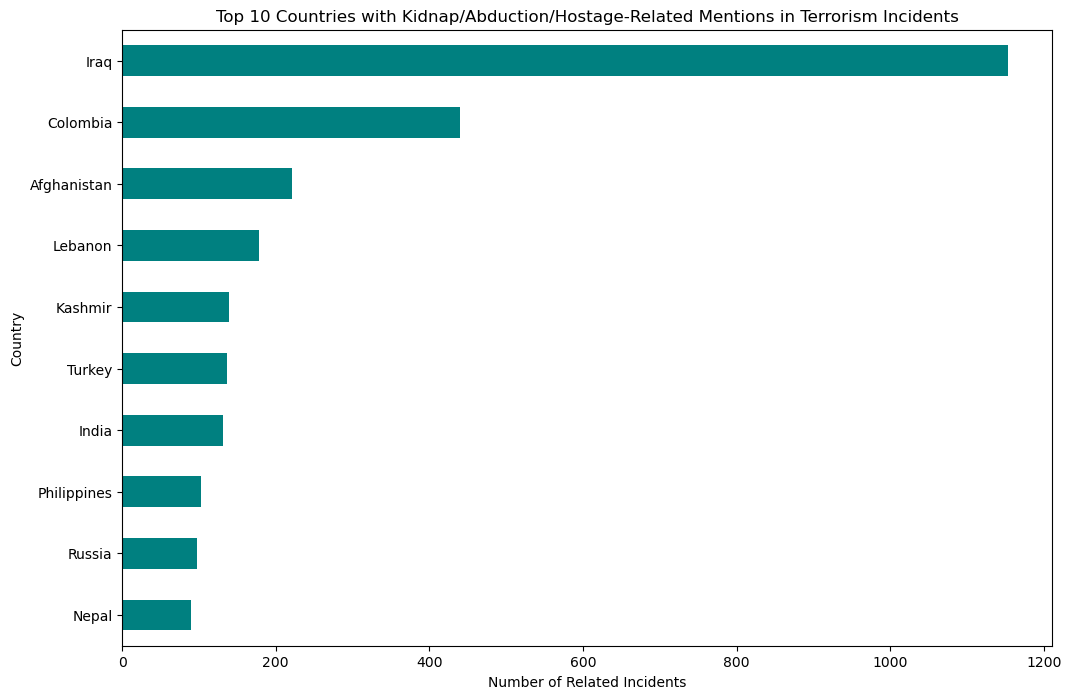

In [225]:
# This code expands the search to identify incidents related to kidnapping, abduction, and captivity by including a broad list of related keywords.
# It filters incidents based on these keywords, then counts occurrences by country, selecting the top 10 countries with the highest counts.
# A total count of all related incidents is appended, and a horizontal bar chart visualizes the top 10 countries where such incidents were mentioned.


# Expanded list of keywords related to kidnapping, abduction, and captivity

keywords = [
    "kidnap", "kidnapped", "kidnapping", "abduct", "abducted", "abduction",
    "hostage", "hostages", "held", "holding", "captured", "capture", "taken",
    "seized", "seize", "detained", "detention", "captive", "captivity", "prisoner",
    "snatch", "snatched", "imprisoned", "confined", "held against will"
]

# Create a regex pattern to match any of these keywords (case-insensitive)
pattern = '|'.join(keywords)

# Filter incidents mentioning any of the keywords in 'Description'
related_incidents = df[df['Description'].str.contains(pattern, case=False, na=False)]

# Count the total number of related incidents
total_related_incidents = related_incidents.shape[0]

# Count occurrences of each keyword across all descriptions
# Convert descriptions to lowercase and count each keyword's mentions
keyword_counts = {word: df['Description'].str.lower().str.count(word).sum() for word in keywords}

# Display keyword mention counts
print("Number of times each kidnapping-related term was mentioned:")
for word, count in keyword_counts.items():
    print(f"{word.capitalize()}: {count}")

print(f"\nTotal number of incidents mentioning expanded related terms: {total_related_incidents}\n")


print("\n=============================================================================================\n")

# Count occurrences by country
incidents_by_country = related_incidents['Country'].value_counts().head(10)  # Top 10 countries

# Add a row for the total sum at the end of the Series using pd.concat
incidents_by_country = pd.concat([incidents_by_country, pd.Series({'Total': total_related_incidents})])

# Display the counts
print("\nTop countries with related mentions (expanded keywords) in incidents:")
print(incidents_by_country)

print("\n=============================================================================================\n")

# Visualization
plt.figure(figsize=(12, 8))
incidents_by_country[:-1].plot(kind='barh', color='teal')  # Exclude 'Total' from the bar chart
plt.title("Top 10 Countries with Kidnap/Abduction/Hostage-Related Mentions in Terrorism Incidents")
plt.xlabel("Number of Related Incidents")
plt.ylabel("Country")
plt.gca().invert_yaxis()  # Invert to have the highest at the top
plt.show()


6. When kindapping was mentioned, how often did the incident result in fatalities?

Out of 4291 kidnapping-related incidents, 1418 resulted in fatalities.
Percentage of kidnapping incidents resulting in fatalities: 33.05%




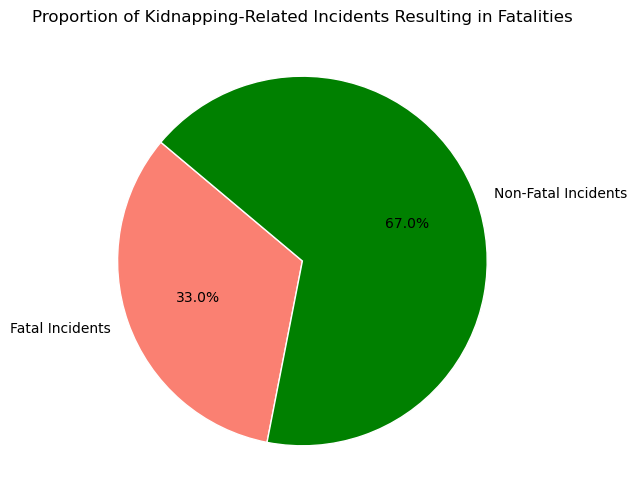

In [233]:
#Your code here


# This code analyzes the proportion of kidnapping-related incidents that resulted in fatalities.
# It filters for incidents mentioning "kidnap," counts total incidents, and identifies those with non-zero fatalities.
# The percentage of fatal incidents is calculated and displayed, followed by a pie chart showing the proportion of fatal vs. non-fatal kidnapping incidents.

# Expanded list of keywords related to kidnapping, abduction, and captivity
keywords = [
    "kidnap", "kidnapped", "kidnapping", "abduct", "abducted", "abduction",
    "hostage", "hostages", "held", "holding", "captured", "capture", "taken",
    "seized", "seize", "detained", "detention", "captive", "captivity", "prisoner",
    "snatch", "snatched", "imprisoned", "confined", "held against will"
]

# Create a regex pattern to match any of these keywords (case-insensitive)
pattern = '|'.join(keywords)

# Filter incidents mentioning any of the keywords in 'Description' (case insensitive)
kidnap_mentions = df[df['Description'].str.contains(pattern, case=False, na=False)]

# Count the total number of kidnapping-related incidents
total_kidnap_incidents = kidnap_mentions.shape[0]

# Count incidents with fatalities (Fatalities > 0)
kidnap_fatalities = kidnap_mentions[kidnap_mentions['Fatalities'] > 0].shape[0]

# Calculate the percentage of kidnapping-related incidents that resulted in fatalities
fatality_percentage = (kidnap_fatalities / total_kidnap_incidents) * 100

print(f"Out of {total_kidnap_incidents} kidnapping-related incidents, {kidnap_fatalities} resulted in fatalities.")
print(f"Percentage of kidnapping incidents resulting in fatalities: {fatality_percentage:.2f}%")

print("\n=============================================================================================\n")

# Visualization

# Calculate non-fatal kidnapping incidents
non_fatal_kidnap = total_kidnap_incidents - kidnap_fatalities

# Data for visualization
labels = ['Fatal Incidents', 'Non-Fatal Incidents']
values = [kidnap_fatalities, non_fatal_kidnap]
colors = ['salmon', 'green']

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(edgecolor='w'))
plt.title("Proportion of Kidnapping-Related Incidents Resulting in Fatalities")
plt.show()

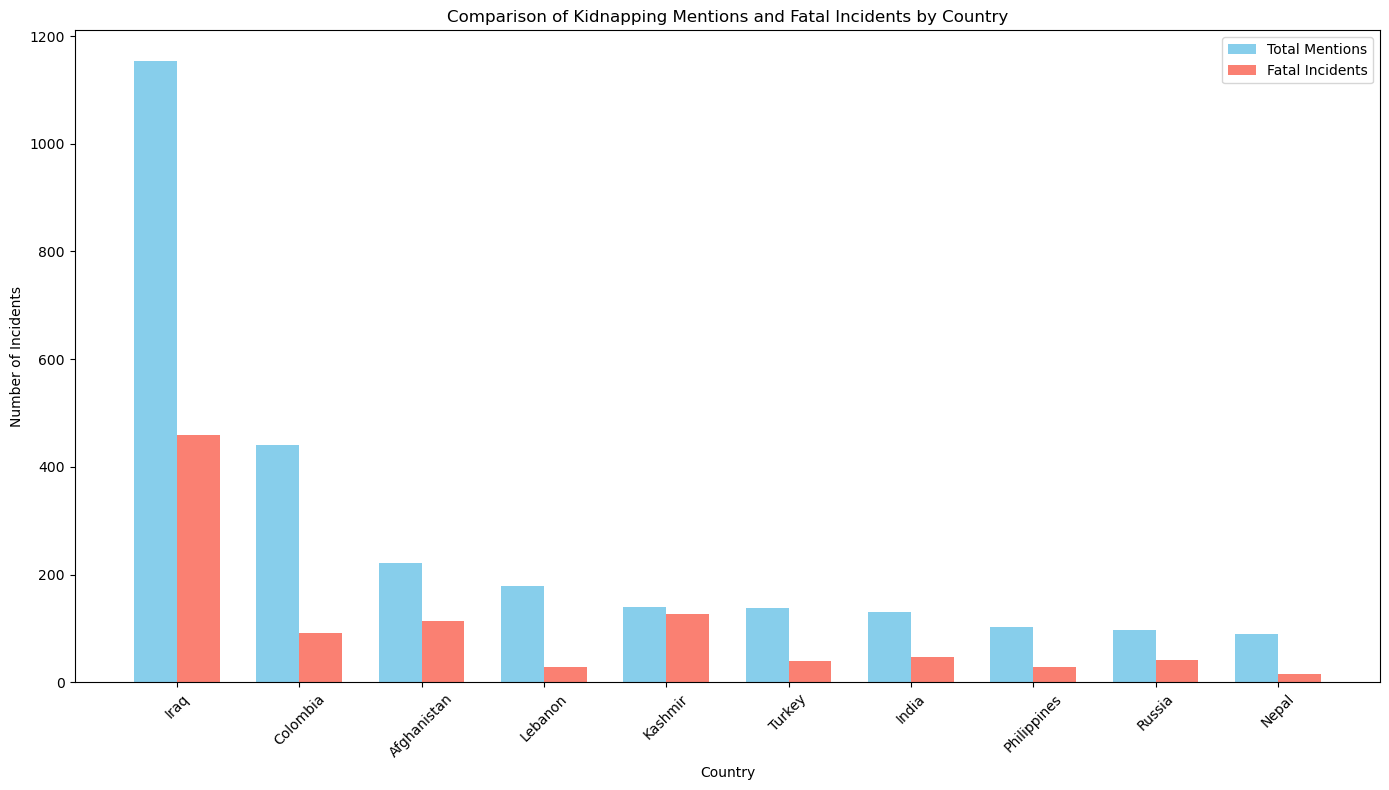

In [237]:
# This code compares kidnapping-related incidents by country, analyzing both total mentions and incidents that resulted in fatalities.
# It filters for incidents mentioning "kidnap," groups the data by country, and counts total mentions and fatal incidents.
# The top 10 countries with the most mentions are selected and visualized in a side-by-side bar chart, showing both total incidents and fatalities for each country.


# Filter incidents mentioning any of the keywords in 'Description' (case insensitive)
kidnap_mentions = df[df['Description'].str.contains(pattern, case=False, na=False)]

# Group by 'Country' to get the total mentions and fatal incidents per country
country_kidnap_counts = kidnap_mentions.groupby('Country').size()
country_kidnap_fatalities = kidnap_mentions[kidnap_mentions['Fatalities'] > 0].groupby('Country').size()

# Combine into a single DataFrame
country_comparison = pd.DataFrame({
    'Total_Mentions': country_kidnap_counts,
    'Fatal_Incidents': country_kidnap_fatalities
}).fillna(0).astype(int)

# Sort by the number of total mentions and select the top 10 countries for clearer visualization
top_countries = country_comparison.sort_values(by='Total_Mentions', ascending=False).head(10)

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(top_countries))

# Plot total mentions and fatal incidents as side-by-side bars
bars1 = ax.bar(index, top_countries['Total_Mentions'], bar_width, label='Total Mentions', color='skyblue')
bars2 = ax.bar(index + bar_width, top_countries['Fatal_Incidents'], bar_width, label='Fatal Incidents', color='salmon')

# Labeling
ax.set_xlabel("Country")
ax.set_ylabel("Number of Incidents")
ax.set_title("Comparison of Kidnapping Mentions and Fatal Incidents by Country")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_countries.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

 
7. When kidnapping was mentioned, how often was "ransom" mentioned?

Out of 2456 kidnapping-related incidents, 149 also mentioned 'ransom'.
Percentage of kidnapping incidents that mention 'ransom': 6.07%




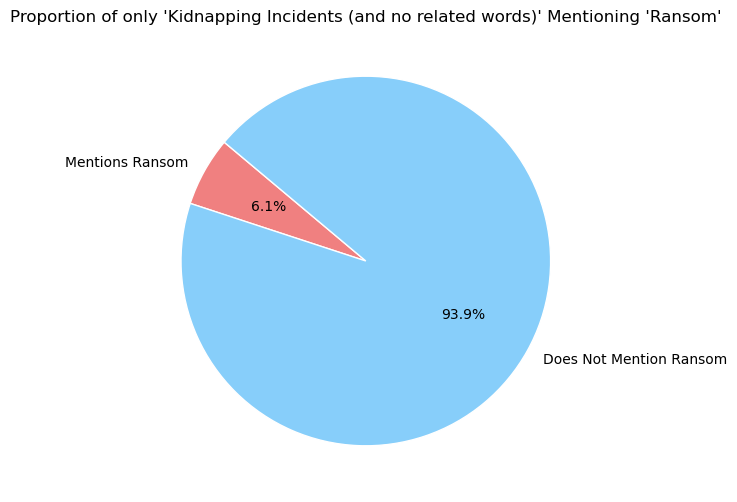

In [245]:
#Your code here:

# This code analyzes the occurrence of "ransom" mentions within kidnapping-related incidents and visualizes the proportion.
# It first filters for incidents that mention "kidnap" and calculates the total number of these incidents.
# Among these, it counts how many also mention "ransom" and calculates the percentage.
# A pie chart visualization shows the proportion of kidnapping incidents that mention "ransom" versus those that do not.

#To start, I will filter for incidents mentioning 'kidnap' in any form (case insensitive)
kidnap_mentions = df[df['Description'].str.contains('kidnap', case=False, na=False)]

# Total number of kidnapping-related incidents
total_kidnap_incidents = kidnap_mentions.shape[0]

# Filter for incidents within the kidnapping-related set that also mention 'ransom'
ransom_mentions_in_kidnap = kidnap_mentions[kidnap_mentions['Description'].str.contains('ransom', case=False, na=False)]
ransom_mention_count = ransom_mentions_in_kidnap.shape[0]

# Calculate the percentage of kidnapping incidents that also mention ransom
ransom_percentage = (ransom_mention_count / total_kidnap_incidents) * 100

print(f"Out of {total_kidnap_incidents} kidnapping-related incidents, {ransom_mention_count} also mentioned 'ransom'.")
print(f"Percentage of kidnapping incidents that mention 'ransom': {ransom_percentage:.2f}%")


print("\n=====================================================================================================\n")

#For Visualization

# Filter for incidents mentioning 'kidnap' in any form
kidnap_mentions = df[df['Description'].str.contains('kidnap', case=False, na=False)]

# Total number of kidnapping-related incidents
total_kidnap_incidents = kidnap_mentions.shape[0]

# Filter for incidents within the kidnapping-related set that also mention 'ransom'
ransom_mentions_in_kidnap = kidnap_mentions[kidnap_mentions['Description'].str.contains('ransom', case=False, na=False)]
ransom_mention_count = ransom_mentions_in_kidnap.shape[0]

# Calculate counts for ransom and non-ransom mentions
non_ransom_count = total_kidnap_incidents - ransom_mention_count

# Data for visualizations
labels = ['Mentions Ransom', 'Does Not Mention Ransom']
values = [ransom_mention_count, non_ransom_count]
colors = ['lightcoral', 'lightskyblue']

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(edgecolor='w'))
plt.title("Proportion of only 'Kidnapping Incidents (and no related words)' Mentioning 'Ransom'")
plt.show()

Out of 4291 kidnapping-related incidents, 186 also mentioned 'ransom'.
Percentage of kidnapping incidents that mention 'ransom': 4.33%




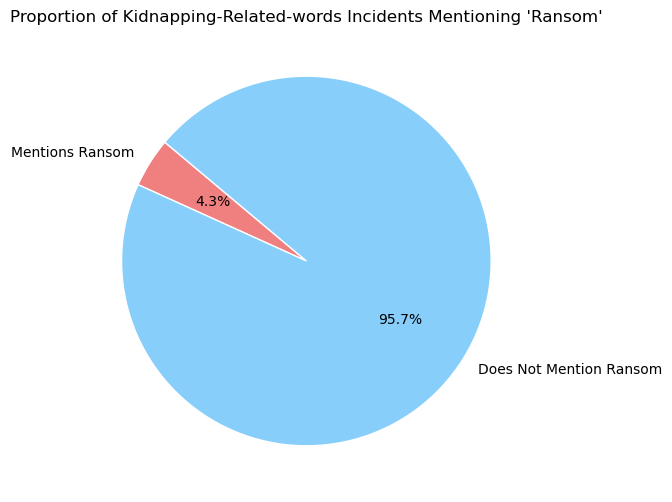

In [247]:
#Rechecking for variations of the "Kidnap"

# Filter for incidents mentioning any kidnapping-related term in 'Description' (case insensitive)
kidnap_mentions = df[df['Description'].str.contains(pattern, case=False, na=False)]

# Total number of kidnapping-related incidents
total_kidnap_incidents = kidnap_mentions.shape[0]

# Filter for incidents within the kidnapping-related set that also mention 'ransom'
ransom_mentions_in_kidnap = kidnap_mentions[kidnap_mentions['Description'].str.contains('ransom', case=False, na=False)]
ransom_mention_count = ransom_mentions_in_kidnap.shape[0]

# Calculate the percentage of kidnapping-related incidents that also mention ransom
ransom_percentage = (ransom_mention_count / total_kidnap_incidents) * 100

print(f"Out of {total_kidnap_incidents} kidnapping-related incidents, {ransom_mention_count} also mentioned 'ransom'.")
print(f"Percentage of kidnapping incidents that mention 'ransom': {ransom_percentage:.2f}%")

print("\n=====================================================================================================\n")

# Visualization

# Calculate counts for ransom and non-ransom mentions
non_ransom_count = total_kidnap_incidents - ransom_mention_count

# Data for visualization
labels = ['Mentions Ransom', 'Does Not Mention Ransom']
values = [ransom_mention_count, non_ransom_count]
colors = ['lightcoral', 'lightskyblue']

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(edgecolor='w'))
plt.title("Proportion of Kidnapping-Related-words Incidents Mentioning 'Ransom'")
plt.show()

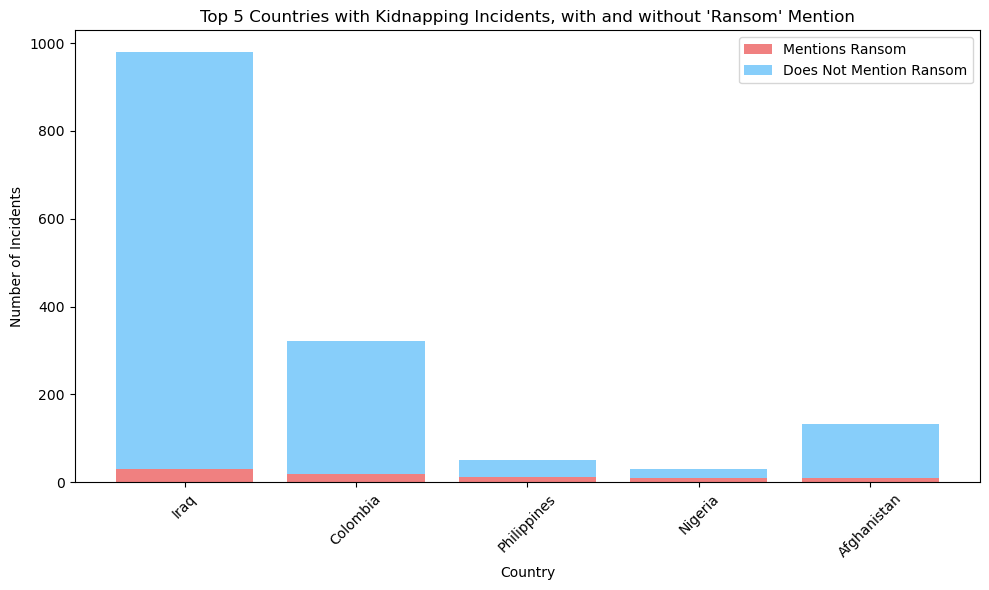

In [249]:
# This code analyzes and visualizes kidnapping-related incidents across countries, distinguishing between those that mention "ransom" and those that do not.
# It filters incidents mentioning "kidnap," then groups these by country based on whether "ransom" was also mentioned. The top 5 countries with 
# the most incidents are selected for a stacked bar chart, which displays both the ransom and non-ransom mentions for each country, with percentage labels.


# Filter incidents mentioning 'kidnap' in any form
kidnap_mentions = df[df['Description'].str.contains('kidnap', case=False, na=False)]

# Group by country for incidents mentioning "ransom" and those that do not
ransom_mentions_by_country = kidnap_mentions[kidnap_mentions['Description'].str.contains('ransom', case=False, na=False)]
non_ransom_mentions_by_country = kidnap_mentions[~kidnap_mentions['Description'].str.contains('ransom', case=False, na=False)]

# Count incidents per country
ransom_counts = ransom_mentions_by_country['Country'].value_counts()
non_ransom_counts = non_ransom_mentions_by_country['Country'].value_counts()

# Combine counts into a DataFrame, keeping only countries where "ransom" was mentioned
country_comparison = pd.DataFrame({
    'Mentions Ransom': ransom_counts,
    'Does Not Mention Ransom': non_ransom_counts
}).dropna().astype(int)  # Drop countries without ransom mentions

# Select top 5 countries where both "kidnap" and "ransom" were mentioned
top_countries = country_comparison['Mentions Ransom'].nlargest(5).index
country_comparison_top = country_comparison.loc[top_countries]

# Visualization with Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(top_countries))

# Plot stacked bars
p1 = ax.bar(index, country_comparison_top['Mentions Ransom'], label='Mentions Ransom', color='lightcoral')
p2 = ax.bar(index, country_comparison_top['Does Not Mention Ransom'], bottom=country_comparison_top['Mentions Ransom'], label='Does Not Mention Ransom', color='lightskyblue')

# Labeling and formatting
ax.set_xlabel("Country")
ax.set_ylabel("Number of Incidents")
ax.set_title("Top 5 Countries with Kidnapping Incidents, with and without 'Ransom' Mention")
ax.set_xticks(index)
ax.set_xticklabels(top_countries, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

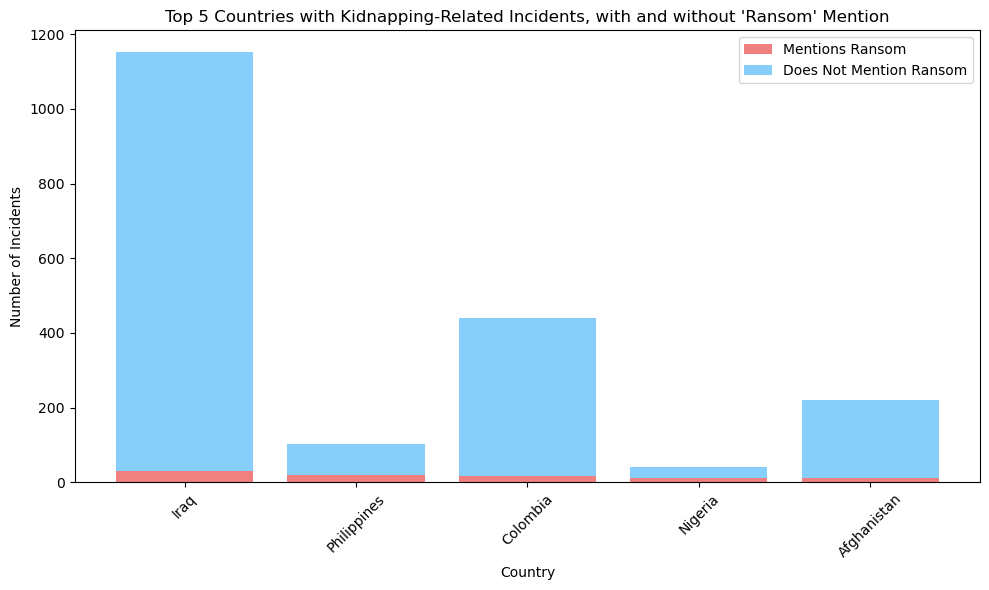

In [251]:
#By checking other related terms

# Filter incidents mentioning any kidnapping-related term in 'Description'
kidnap_mentions = df[df['Description'].str.contains(pattern, case=False, na=False)]

# Group by country for incidents mentioning "ransom" and those that do not
ransom_mentions_by_country = kidnap_mentions[kidnap_mentions['Description'].str.contains('ransom', case=False, na=False)]
non_ransom_mentions_by_country = kidnap_mentions[~kidnap_mentions['Description'].str.contains('ransom', case=False, na=False)]

# Count incidents per country
ransom_counts = ransom_mentions_by_country['Country'].value_counts()
non_ransom_counts = non_ransom_mentions_by_country['Country'].value_counts()

# Combine counts into a DataFrame, keeping only countries where "ransom" was mentioned
country_comparison = pd.DataFrame({
    'Mentions Ransom': ransom_counts,
    'Does Not Mention Ransom': non_ransom_counts
}).dropna().astype(int)  # Drop countries without ransom mentions

# Select top 5 countries where both "kidnap" and "ransom" were mentioned
top_countries = country_comparison['Mentions Ransom'].nlargest(5).index
country_comparison_top = country_comparison.loc[top_countries]

# Visualization with Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(top_countries))

# Plot stacked bars
p1 = ax.bar(index, country_comparison_top['Mentions Ransom'], label='Mentions Ransom', color='lightcoral')
p2 = ax.bar(index, country_comparison_top['Does Not Mention Ransom'], bottom=country_comparison_top['Mentions Ransom'], label='Does Not Mention Ransom', color='lightskyblue')

# Labeling and formatting
ax.set_xlabel("Country")
ax.set_ylabel("Number of Incidents")
ax.set_title("Top 5 Countries with Kidnapping-Related Incidents, with and without 'Ransom' Mention")
ax.set_xticks(index)
ax.set_xticklabels(top_countries, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

8.In all of the incidents, how often were "students" mentioned as perpertators?

'Students' were mentioned as perpetrators in 6 incidents.
Percentage of incidents involving students as perpetrators: 0.01%




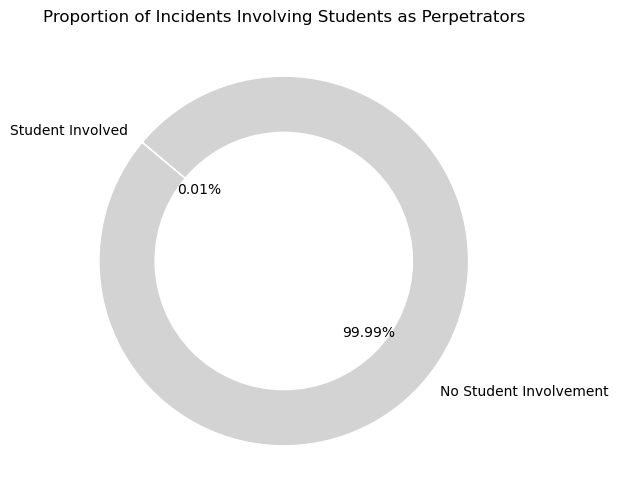

In [253]:
#Your code here:

# This code identifies and visualizes incidents in the dataset where "students" were mentioned as perpetrators.
# It first filters for incidents with "student" in the 'Perpetrator' column, counts occurrences, and calculates their percentage 
# relative to the total number of incidents. The data is then visualized in a donut chart, showing the proportion 
# of incidents with and without student involvement as perpetrators.

student_mentions = df[df['Perpetrator'].str.contains('student', case=False, na=False)]

# Count total incidents mentioning "students" as perpetrators
student_mention_count = student_mentions.shape[0]

# Calculate the percentage of total incidents involving students
total_incidents = df.shape[0]
student_percentage = (student_mention_count / total_incidents) * 100

print(f"'Students' were mentioned as perpetrators in {student_mention_count} incidents.")
print(f"Percentage of incidents involving students as perpetrators: {student_percentage:.2f}%")

print("\n=====================================================================================================\n")

#For Visualization

non_student_count = total_incidents - student_mention_count

# Data for visualization
labels = ['Student Involved', 'No Student Involvement']
values = [student_mention_count, non_student_count]
colors = ['salmon', 'lightgrey']

# Donut Chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors, wedgeprops=dict(edgecolor='w'))
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Proportion of Incidents Involving Students as Perpetrators")
plt.show()

9. What was the first incident where a "suicide bomber" was mentioned?

In [255]:
#Your code here:

# This code identifies the first incident mentioning a "suicide bomber" in the dataset.
# It filters for incidents containing the phrase "suicide bomber" in the description, sorts by date,
# and extracts the earliest entry. The details, including the date, country, and a brief description of the incident,
# are displayed in a single formatted sentence for easy reference.

# Filter for incidents mentioning "suicide bomber" (case insensitive)
suicide_bomber_mentions = df[df['Description'].str.contains('suicide bomber', case=False, na=False)].copy()

# Convert 'Date' to datetime, assuming the format is 'YYYY-MM-DD'. Adjust format as needed.
suicide_bomber_mentions['Date'] = pd.to_datetime(suicide_bomber_mentions['Date'] , errors='coerce')

# Sort by Date to find the first incident
first_suicide_bomber_incident = suicide_bomber_mentions.sort_values(by='Date').iloc[0]

# Display the first incident mentioning "suicide bomber"
print("The first incident where 'suicide bomber' was mentioned:")
print(first_suicide_bomber_incident)

# Extracting the relevant details
incident_description = first_suicide_bomber_incident['Description']
incident_country = first_suicide_bomber_incident['Country']
incident_year = first_suicide_bomber_incident['Date'].year

print("\n=====================================================================================================\n")


# Print the summary in a single sentence
print(f"Therefore, the first mention of a suicide bomber was in {incident_year}, in {incident_country}. Description: {incident_description}")

The first incident where 'suicide bomber' was mentioned:
Date                                         1985-02-06 00:00:00
City                                                         NaN
Country                                                  Lebanon
Perpetrator                                              Unknown
Weapon                                                Explosives
Injuries                                                      10
Fatalities                                                     0
Description    LEBANON.  Ten Israeli soldiers were wounded in...
Name: 3889, dtype: object


Therefore, the first mention of a suicide bomber was in 1985, in Lebanon. Description: LEBANON.  Ten Israeli soldiers were wounded in a car-bomb attack near the Burj Shemali Palestinian refugee camp in southern Lebanon.  It was unclear whether the car was stationary or driven by a suicide bomber.


C:\Users\jaa262\AppData\Local\Temp\ipykernel_34636\3365642735.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  suicide_bomber_mentions['Date'] = pd.to_datetime(suicide_bomber_mentions['Date'] , errors='coerce')


 
10. How often were "priests" or "clergy" mentioned?

23
'Priests' or 'clergy' were mentioned in 23 incidents.




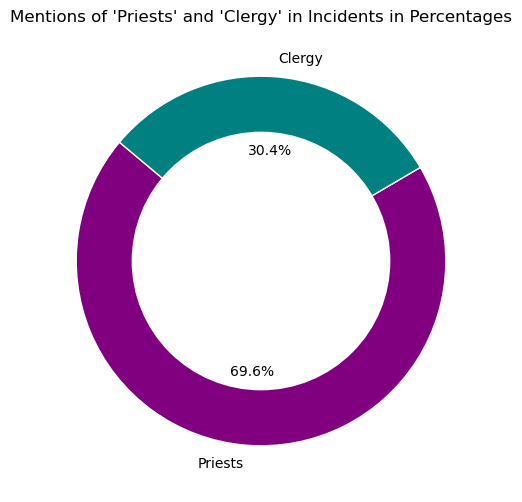

In [257]:
#Your code here:

# This code identifies and visualizes incidents in the dataset where "priests" or "clergy" were mentioned.
# It first filters for incidents with these terms in the 'Description' column, then counts the total occurrences.
# Separate counts are created for each term ("priests" and "clergy"), and a donut chart visualizes their proportions.
# The chart provides a breakdown of each group's relative frequency in the dataset.

# Filter for incidents mentioning "priests" or "clergy" in the description (case-insensitive)
clergy_mentions = df[df['Description'].str.contains('priests|clergy', case=False, na=False)]

# Count total incidents mentioning "priests" or "clergy"
clergy_mention_count = clergy_mentions.shape[0]
print(clergy_mention_count)

# Display the count
print(f"'Priests' or 'clergy' were mentioned in {clergy_mention_count} incidents.")

print("\n=====================================================================================================\n")


# Filter for mentions of "priests" and "clergy" separately
priests_mentions = df[df['Description'].str.contains('priests', case=False, na=False)]
clergy_mentions = df[df['Description'].str.contains('clergy', case=False, na=False)]

# Count occurrences
priests_count = priests_mentions.shape[0]
clergy_count = clergy_mentions.shape[0]

# Data for visualization
labels = ['Priests', 'Clergy']
values = [priests_count, clergy_count]
colors = ['purple', 'teal']

# Donut Chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(edgecolor='w'))
center_circle = plt.Circle((0, 0), 0.70, fc='white')  # Add a white circle at the center to create the donut effect
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Mentions of 'Priests' and 'Clergy' in Incidents in Percentages")
plt.show()

11. Name all the incidents where a woman or women were identified as terrorists. Not the victims, the terrorists.

In [269]:
# This code identifies incidents in the dataset where women were specifically mentioned as terrorists or perpetrators.
# It filters for female-related terms (like "female," "woman," "women," or "girl") within the 'Perpetrator' column.
# If relevant incidents are found, each one is reported with key details such as date, location, and description. 
# Otherwise, a message is displayed indicating that no such incidents were found.

#To begin;
# Filter only by the 'Perpetrator' column for terms like "female," "woman," "women," or "girl"
female_terrorist_mentions = df[df['Perpetrator'].str.contains('female|woman|women|girl', case=False, na=False)]
print(female_terrorist_mentions)


print("\n===================================================================================================\n")

# Check if the filtered DataFrame is empty
if female_terrorist_mentions.empty:
    print("No incidents found where a woman or women were identified as terrorists.")
else:
    # Report each case in a single print statement
    print("Incidents where a woman or women were identified as terrorists:\n")
    for index, row in female_terrorist_mentions.iterrows():
        date = row['Date']
        country = row['Country']
        city = row['City'] if pd.notna(row['City']) else "Unknown City"
        perpetrator = row['Perpetrator']
        description = row['Description']
        print(f"On {date}, in {city}, {country}, the perpetrators were identified as {perpetrator}. Incident description: {description}\n")

Empty DataFrame
Columns: [Date, City, Country, Perpetrator, Weapon, Injuries, Fatalities, Description]
Index: []


No incidents found where a woman or women were identified as terrorists.
